In [1]:
import tensorflow.keras.losses as losses

def iou(y_true, y_pred):
    
    smooth = 1.  # 0으로 나누는 것 방지
    
    # Flatten
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    
    score = intersection / (union + smooth)
    return score

def dice_coef(y_true, y_pred):
    
    smooth = 1.  # 0으로 나누는 것 방지
    
    # Flatten
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    
    intersection = tf.reduce_sum(y_true * y_pred)
    
    score = (2 * intersection) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)
    return score

def dice_loss(y_true, y_pred):
    
    loss = 1 - dice_coef(y_true, y_pred)

    return loss

def bce_dice_loss(y_true, y_pred):
    
    loss = 1. * losses.binary_crossentropy(y_true,y_pred) + 1. * dice_loss(y_true, y_pred)

    return loss

In [2]:
from tensorflow.keras.models import load_model
model = load_model('second_model.h5', custom_objects={'bce_dice_loss':bce_dice_loss, 'iou':iou})

In [3]:
import numpy as np

def Predict_model(images):
    
    image_datas = np.zeros((len(images), 256,256,3))
    
    for i in range(len(images)):
        image_datas[i] = images[i][:,:,:3]
        
    preds = model.predict(image_datas)
    
    for i in range(len(images)):
        preds[i] = preds[i]
        
    return preds

In [4]:
import matplotlib.pyplot as plt
import os

## image, label 설정
test_img_path_24 = 'D:/cube_resized/86/24/'

num_24 = len(next(os.walk(test_img_path_24))[2])

test_images_24 = np.zeros((num_24,256,256,3))

for i in range(num_24):
    test_images_24[i] = plt.imread(test_img_path_24 + next(os.walk(test_img_path_24))[2][i])[:,:,:3]

In [5]:
test_labels_24 = Predict_model(test_images_24)

In [7]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_127 (Conv2D)             (None, 256, 256, 16) 432         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_74 (BatchNo (None, 256, 256, 16) 64          conv2d_127[0][0]                 
__________________________________________________________________________________________________
spatial_dropout2d_21 (SpatialDr (None, 256, 256, 16) 0           batch_normalization_74[0][0]     
____________________________________________________________________________________________

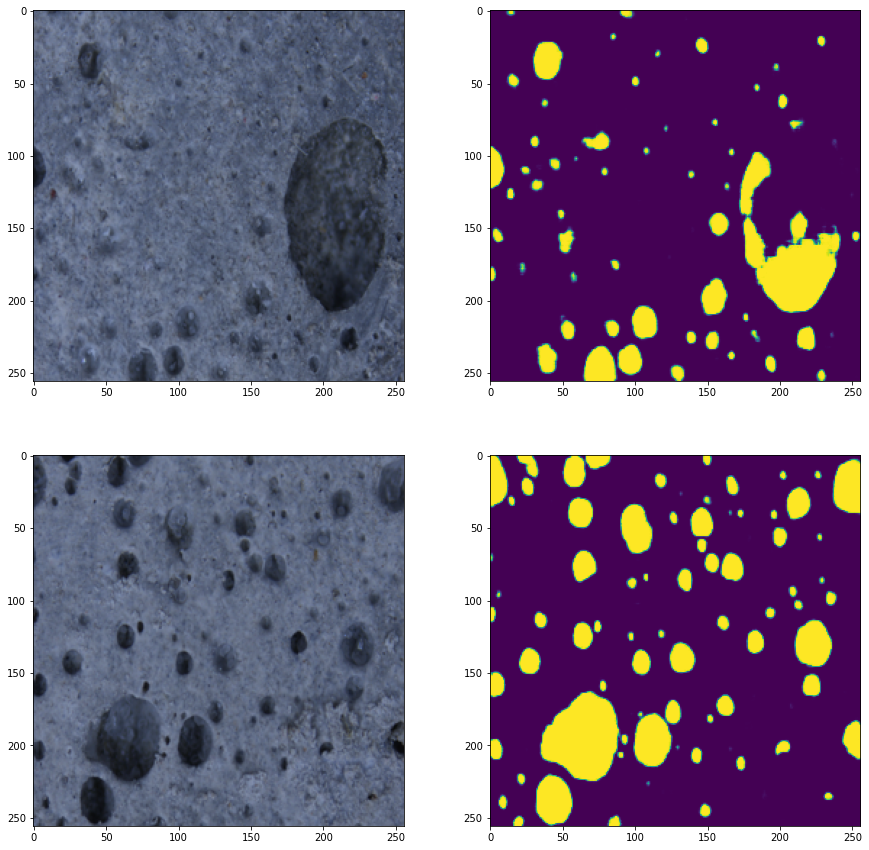

In [6]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(test_images_24[186])
plt.subplot(2,2,2)
plt.imshow(test_labels_24[186])
plt.subplot(2,2,3)
plt.imshow(test_images_24[6])
plt.subplot(2,2,4)
plt.imshow(test_labels_24[6])

In [10]:
porosity_24 = []
for i in range(test_labels_24.shape[0]):
    cnt = 0
    for j in range(256):
        for k in range(256):
            if test_labels[i][j][k] >= 0.5:
                cnt += 1
    porosity_24.append(cnt/(256*256)*100)
    
porosity_24

[12.99591064453125,
 12.1551513671875,
 13.958740234375,
 9.85870361328125,
 2.46734619140625,
 4.58221435546875,
 8.85467529296875,
 15.32135009765625,
 13.5009765625,
 13.89923095703125,
 11.02142333984375,
 7.147216796875,
 5.5023193359375,
 4.6844482421875,
 6.22711181640625,
 9.12017822265625,
 10.87188720703125,
 13.12408447265625,
 12.12615966796875,
 9.844970703125,
 6.25,
 7.1319580078125,
 10.5133056640625,
 9.56573486328125,
 10.17303466796875,
 5.963134765625,
 11.8377685546875,
 11.260986328125,
 9.33074951171875,
 8.79669189453125,
 6.40411376953125,
 1.7242431640625,
 1.96075439453125,
 3.82232666015625,
 4.01763916015625,
 7.666015625,
 8.61663818359375,
 3.7933349609375,
 7.9864501953125,
 6.6619873046875,
 1.666259765625,
 2.0111083984375,
 6.57806396484375,
 11.63787841796875,
 2.94952392578125,
 5.80902099609375,
 9.674072265625,
 6.23016357421875,
 5.78765869140625,
 2.0355224609375]

In [11]:
np.average(porosity_24)

7.90240478515625

In [12]:
test_img_path = 'D:/cube_resized/86/35/'

num = len(next(os.walk(test_img_path))[2])

test_images = np.zeros((num,256,256,3))

for i in range(num):
    test_images[i] = plt.imread(test_img_path + next(os.walk(test_img_path))[2][i+200])[:,:,:3]

    
    
test_labels = Predict_model(test_images)

In [13]:
porosity_35 = []
for i in range(test_labels.shape[0]):
    cnt = 0
    for j in range(256):
        for k in range(256):
            if test_labels[i][j][k] >= 0.5:
                cnt += 1
    porosity_35.append(cnt/(256*256)*100)
    
porosity_35

[1.348876953125,
 0.55389404296875,
 2.75115966796875,
 4.10003662109375,
 2.1942138671875,
 1.79290771484375,
 0.860595703125,
 1.03759765625,
 0.897216796875,
 7.23876953125,
 2.95257568359375,
 1.7852783203125,
 0.445556640625,
 0.72784423828125,
 2.7130126953125,
 4.2022705078125,
 1.9927978515625,
 3.28216552734375,
 0.6744384765625,
 0.9368896484375,
 0.55694580078125,
 1.5594482421875,
 3.92608642578125,
 1.6204833984375,
 1.9683837890625,
 1.84173583984375,
 1.17645263671875,
 2.18353271484375,
 2.4658203125,
 1.49383544921875,
 1.87835693359375,
 1.96533203125,
 4.779052734375,
 3.59954833984375,
 3.26995849609375,
 2.1881103515625,
 1.13983154296875,
 1.7974853515625,
 1.5167236328125,
 1.13983154296875,
 7.41424560546875,
 3.4149169921875,
 0.8209228515625,
 2.81219482421875,
 1.06353759765625,
 2.63824462890625,
 2.337646484375,
 1.8157958984375,
 2.0172119140625,
 0.77056884765625]

In [14]:
np.average(porosity_35)

2.193206787109375

In [18]:
test_img_path = 'D:/cube_resized/86/50/'

num = 50
test_images = np.zeros((num,256,256,3))

for i in range(num):
    test_images[i] = plt.imread(test_img_path + next(os.walk(test_img_path))[2][i+200])[:,:,:3]

    
    
test_labels = Predict_model(test_images)

In [19]:
porosity_50 = []
for i in range(test_labels.shape[0]):
    cnt = 0
    for j in range(256):
        for k in range(256):
            if test_labels[i][j][k] >= 0.5:
                cnt += 1
    porosity_50.append(cnt/(256*256)*100)
    
porosity_50

[0.27313232421875,
 2.78167724609375,
 2.07672119140625,
 1.19171142578125,
 0.99029541015625,
 2.23388671875,
 5.26580810546875,
 0.164794921875,
 0.30059814453125,
 0.66375732421875,
 1.00860595703125,
 0.7354736328125,
 1.70745849609375,
 1.6082763671875,
 2.1881103515625,
 1.81884765625,
 1.751708984375,
 1.35345458984375,
 2.801513671875,
 1.5655517578125,
 1.02081298828125,
 1.38092041015625,
 0.91552734375,
 1.031494140625,
 2.67791748046875,
 2.69927978515625,
 1.71661376953125,
 1.74407958984375,
 1.6021728515625,
 2.4810791015625,
 5.2490234375,
 3.18450927734375,
 2.2918701171875,
 0.91400146484375,
 1.7578125,
 1.24053955078125,
 1.76849365234375,
 2.07061767578125,
 3.350830078125,
 1.171875,
 1.56707763671875,
 1.2237548828125,
 2.8778076171875,
 2.12860107421875,
 2.01416015625,
 5.67169189453125,
 2.6580810546875,
 2.04925537109375,
 3.9703369140625,
 3.7445068359375]

In [20]:
np.average(porosity_50)

2.01312255859375

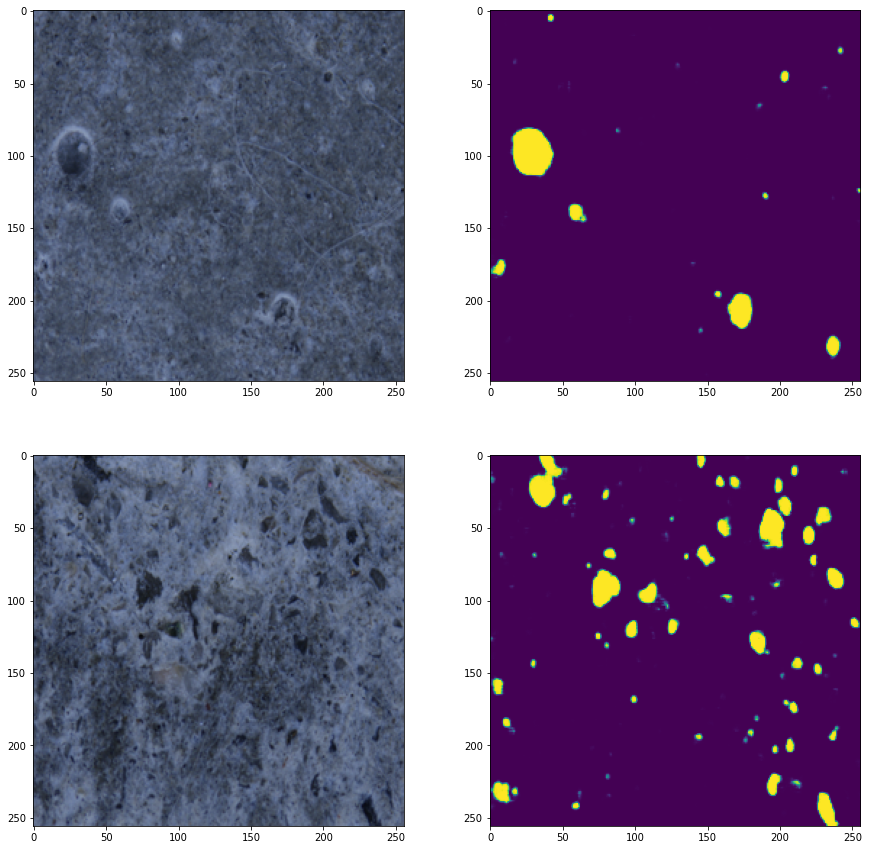

In [21]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(test_images[14])
plt.subplot(2,2,2)
plt.imshow(test_labels[14])
plt.subplot(2,2,3)
plt.imshow(test_images[6])
plt.subplot(2,2,4)
plt.imshow(test_labels[6])

In [35]:
a = np.array([1.2])

In [36]:
a

array([1.2])

In [40]:
a = a.astype(np.float64)

In [42]:
a[0]

1.2

In [16]:
import pandas as pd

a = pd.read_csv('24.txt', encoding='utf-8', names=['24'])
df = pd.DataFrame(a)

In [19]:
b = pd.read_csv('35.txt', encoding='utf-8', names=['35'])
df['35'] = b
c = pd.read_csv('50.txt', encoding='utf-8', names=['50'])
df['50'] = c

In [20]:
df

,24,35,50
0,13.554029,5.797136,2.381885
1,12.514754,3.662278,1.982628
2,13.236845,2.792826,2.406419
3,13.266422,2.364963,2.037105
4,9.006011,4.791782,1.897670
...,...,...,...
938,11.368527,16.589051,NaN
939,9.174104,5.953850,NaN
940,11.915913,7.723764,NaN
941,8.153314,0.547924,NaN


In [21]:
df.to_excel('porosity.xlsx')